# Basics of Computational Fluid Dynamics

We have all the tools to address a physical problem of relevance in all the sciences and engineering: how does a fluid behave?

From the perspective we are using in this course we want to know what is the equation that should encode a fluid's behavior. That equation is the Navier-Stokes equation.

$$
\frac{\partial\vec{V}}{\partial t}+ (\vec{V}\cdot\nabla)\vec{V} = -\frac{1}{\rho}\nabla p + \nu\nabla^2\vec{V}
$$

where $\vec{V}$ is the velocity field describing the fluid motion, $\rho$ is the density, $p$ is the pressure and $\nu$ is a constant known as viscosity.

Just to make the discussion a bit more concrete I will write this equation in 1D

$$
\frac{\partial V_x}{\partial t} + V_x\frac{\partial V_x}{\partial x} = -\frac{1}{\rho}\frac{\partial p}{\partial x} + \nu\frac{\partial^2 V_x}{\partial x^2}
$$

In this equation $V_x\frac{\partial V_x}{\partial x}$ represents convection and $\nu\frac{\partial^2 V_x}{\partial x^2}$ represents difussion.

## The plan

The plan to solve this problem is write each derivative as finite differences expressions. This will allows us to discretize
time and space (i.e. define $\Delta t$ and $\Delta x$) to find how our function $V_x$ evolves in time and space


We are going to study the following processes in increasing complexity

- Linear convection
- Non-linear convection
- Difussion
- Non-linear convection + difussion (Burgers equation)

Please note tat this notebook follows the structure of Prof. Lorena Barba's 12 steps to Navier Stokes:
http://nbviewer.ipython.org/github/barbagroup/CFDPython/tree/master/lessons/

### Linear convection

We want to solve the following equation

$$
\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} = 0
$$

How do we do it? We discretize the derivatives:

$$
\frac{\partial u}{\partial x} \approx \frac{u_{i}^j -  u_{i-1}^j}{\Delta x}
$$

$$
\frac{\partial u}{\partial t} \approx \frac{u_i^{j+1} -  u_i^j}{\Delta t}
$$

So we can rewrite the equation
$$
\frac{u_i^{j+1} -  u_i^j}{\Delta t} = - c \frac{u_{i}^j -  u_{i-1}^j}{\Delta x}
$$

$$
u_{i}^{j+1} = u_{i}^{j} - c\frac{\Delta t}{\Delta x}(u_i^j - u_{i-1}^j) 
$$

We now go for the implementation in Python.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
n_x = 80
n_t = 300

x = linspace(0, 2.0, n_x)
u = ones(n_x)

dx = x[1]-x[0]
dt = 0.001
c = 1.0

#but now the initial condition is not flat
u[where((x<1.25) & (x>0.75))] = 2.0

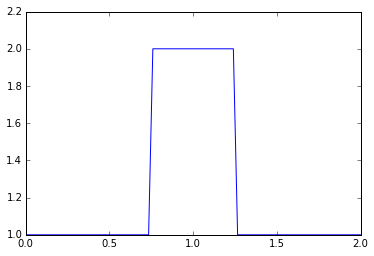

In [3]:
plot(x,u)

In [4]:
for n in range(n_t):  # loop over time
    u_past = u.copy() 
    for i in range(1,n_x-1): #loop over space
        u[i] = u_past[i] - c*dt/dx*(u_past[i]-u_past[i-1])

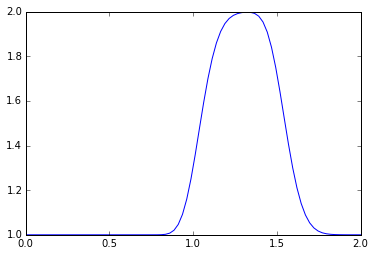

In [5]:
plot(x,u)

## Non-Linear convection

Now the equation is a bit different
$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0
$$

In [6]:
n_x = 80
n_t = 300

x = linspace(0, 2.0, n_x)
u = ones(n_x)

dx = x[1]-x[0]
dt = 0.001

print dx/dt

#but now the initial condition is not flat
u[where((x<1.25) & (x>0.75))] = 2.0

25.3164556962


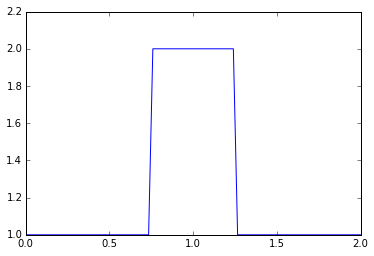

In [7]:
plot(x,u)

In [8]:
for n in range(n_t):  # loop over time
    u_past = u.copy() 
    for i in range(1,n_x): #loop over space
        u[i] = u_past[i] - u_past[i]*dt/dx*(u_past[i]-u_past[i-1])

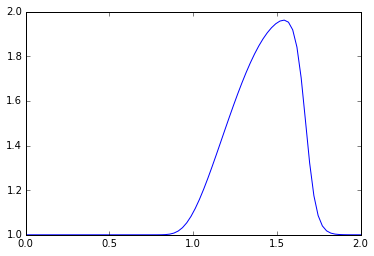

In [9]:
plot(x,u)

## Difusion

Now we want to solve the equation
$$
\frac{\partial u}{\partial t} = \nu\frac{\partial^2 u}{\partial x^2} 
$$

We already had the discretized version


$$
\frac{\partial u}{\partial t} \approx \frac{u_{i}^{j+1} - u_{i}^{j}}{\Delta t}
$$

$$
\frac{\partial^2 u}{\partial x^2} \approx \frac{u_{i+1}^j - 2 u_{i}^{j} + u_{i-1}^{j}}{(\Delta x)^2}
$$

And the finite differences scheme can be found
$$
\frac{u_{i}^{j+1} - u_{i}^{j}}{\Delta t} = \nu \frac{u_{i+1}^j - 2 u_{i}^{j} + u_{i-1}^{j}}{(\Delta x)^2} 
$$

$$
u_{i}^{j+1} = \nu\alpha u_{i+1}^{j} + (1 - 2\nu\alpha)u_{i}^{j} + \nu\alpha u_{i-1}^{j}
$$

where $\alpha = \Delta t/ (\Delta x)^2$.

In [10]:
n_x = 80
n_t = 100

c = 1.0
nu = 0.3
sigma = 0.2 #sigma is a parameter to ensure \alpha\nu < 0.5

x = linspace(0, 2.0, n_x)
dx = x[1]-x[0]


dt = sigma*dx**2/nu #dt is defined using sigma
alpha = dt/dx**2
print dt

u = ones(n_x)

u[where((x<1.25) & (x>0.75))] = 2.0

0.000427281952679


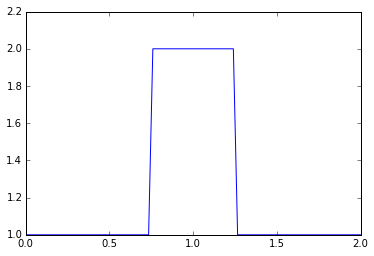

In [11]:
plot(x,u)

In [12]:
for n in range(n_t):  # loop over time
    u_past = u.copy() 
    for i in range(1,n_x-1): #loop over space
        u[i] = nu * alpha * u_past[i+1]  + (1.0 - 2.0*nu*alpha)*u_past[i] + nu*alpha*u_past[i-1]

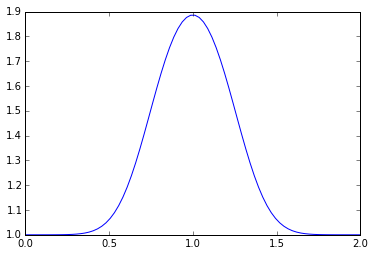

In [13]:
plot(x,u)

### Burgers Equation

Now we have the Burgers equation:
$$
\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = \nu\frac{\partial^2 u}{\partial x^2}
$$

Which includes the terms of non-linear convection and difussion. Your task is to solve this equation in 1D (using Python!).

It might be useful to follow the instruction of Prof. Lorena Barba
http://nbviewer.ipython.org/github/barbagroup/CFDPython/blob/master/lessons/05_Step_4.ipynb

In [27]:
n_x = 100
n_t = 700

nu = 0.07
sigma = 0.02 #sigma is a parameter to ensure \alpha\nu < 0.5

x = linspace(0, 2.0*pi, n_x)
dx = x[1]-x[0]

dt = sigma*dx**2/nu #dt is defined using sigma 
alpha = dt/dx**2

print dt

u = sin(x)#+2.0

0.00115085683981


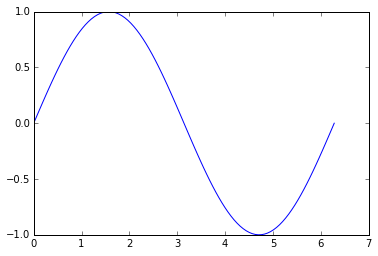

In [28]:
plot(x,u)

In [29]:
u_past = zeros(n_x) 
for n in range(n_t):  # loop over time
    u_past = u.copy() 
    for i in range(0,n_x-1): #loop over space
        u[i] = u_past[i] - u_past[i]*dt/dx*(u_past[i]-u_past[i-1]) + nu * alpha * (u_past[i+1] -2.0*u_past[i]+u_past[i-1])
    u[-1] = u_past[-1] - u_past[-1]*dt/dx*(u_past[-1]-u_past[-2]) + nu * alpha * (u_past[0] -2.0*u_past[-1]+u_past[-2])

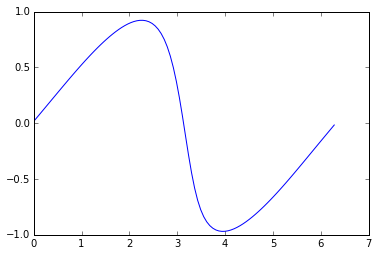

In [30]:
plot(x,u)

# Exercise

1. Write a program in C to compute the solution of the 1D Burgers Equation.
Make a program in Python to make a movie (or animated gif) of the time evolution. Use the same initial conditions as above. 

2. Write a program in C to compute the solution of the 2D Burguers Equation.
Make a program in Python to make a movie (or animated gif) of the time evolution. Follow this: http://nbviewer.ipython.org/github/barbagroup/CFDPython/blob/master/lessons/10_Step_8.ipynb